# 1. Exploring the Brown Dwarf Synthetic Dataset



In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Check the variables and parameters in the dataset
- Visualize them for few cases

---

Before going through this tutorial, make sure to check you have installed `TelescopeML` successfully as discussed in this [installation link](https://ehsangharibnezhad.github.io/TelescopeML/installation.html). 

In a nutshell: 

   [1] You are at **TelescopeML_project/notebooks** directory because you have created your directory structure 

   [2] The trained ML models and datasets are now in your **TelescopeML_project/reference_data** directory.

   [3] Path is defined to your **reference_data**. Confirm it by <code> os.getenv("TelescopeML_reference_data") </code> 
   
   [4] And last, you should be able to execute `import TelescopeML` with no issue!

Happy *TelescopeML*ing! ;) 

---

In [1]:
# Let's first import libraries we need in this tutorial!
from TelescopeML.StatVisAnalyzer import *

##  1.1 Load the Synthetic spectra

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/E] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

### Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


## 1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/E] )


Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!



In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


## 1.3 Check the training variables 
1. training_features_labels: they are (Wavelengths and fluxes in astrophysics context)

In [5]:
training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


## 1.4 Visualize the Brown Dwarf spectra for different parameters


### 1.4.1  Effective Temperature 

Plot the brown dwarf datasets for $T_{eff}$= 400-1800K while other paremeters are constnat (log$g$=5, C/O=1, [M/E]=0)

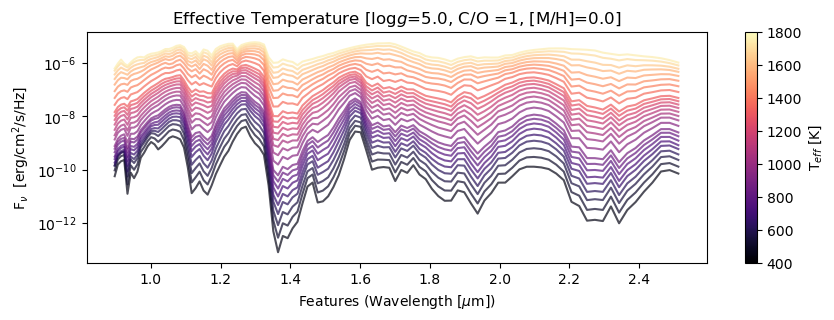

In [8]:
# Define the filter bounds
filter_bounds = {'gravity': (5.,5), 
                 'c_o_ratio' : (1,1),
                 'metallicity' : (0.0,0.0),
                 'temperature': (400, 1800)}

# Call the function to filter the dataset
plot_filtered_dataframe(train_BD[train_BD['is_augmented'].isin(
                                    ['no'])], 
                                       filter_bounds,
                                       'temperature',
                                     title_label = '[log$g$='+str(filter_bounds['gravity'][0])+
                                    ', C/O ='+str(filter_bounds['c_o_ratio'][0])+
                                    ', [M/H]='+str(filter_bounds['metallicity'][0])+
                        ']',
                             wl_synthetic = wl_synthetic.wl,
                            __reference_data__ = __reference_data_path__)

### 1.4.2 Gravity

Plot the brown dwarf datasets for log$g$= 3-5.5 while other paremeters are constnat ($T_{eff}$=800, C/O=1, [M/E]=0)

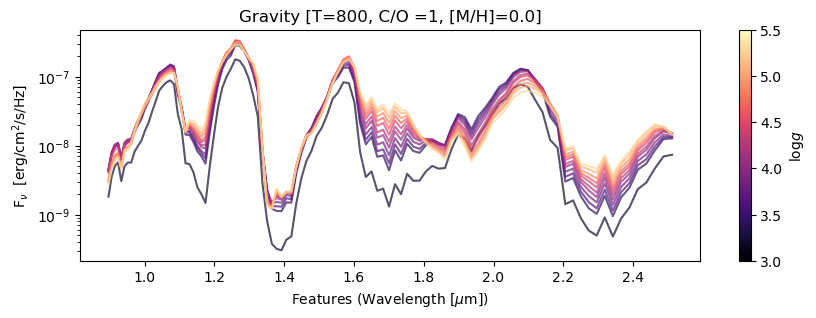

In [9]:
# Define the filter bounds
filter_bounds = {'gravity': (3,5.5), 
                 'c_o_ratio' : (1,1),
                 'metallicity' : (0.0,0.0),
                 'temperature': (800, 800)}

# Call the function to filter the dataset
plot_filtered_dataframe(train_BD[train_BD['is_augmented'].isin(
                                    ['no'])], 
                                       filter_bounds,
                                       'gravity',                                     
                        title_label = '[T='+str(filter_bounds['temperature'][0])+
                                    ', C/O ='+str(filter_bounds['c_o_ratio'][0])+
                                    ', [M/H]='+str(filter_bounds['metallicity'][0])+
                        ']',
                             wl_synthetic = wl_synthetic.wl,
                            __reference_data__ = __reference_data_path__)

### 1.4.3 Carbon-to-Oxygen ratio

Plot the brown dwarf datasets for C/O= 0.25-2.5 while other paremeters are constnat ($T_{eff}$=800, log$g$=5.0, [M/E]=0)

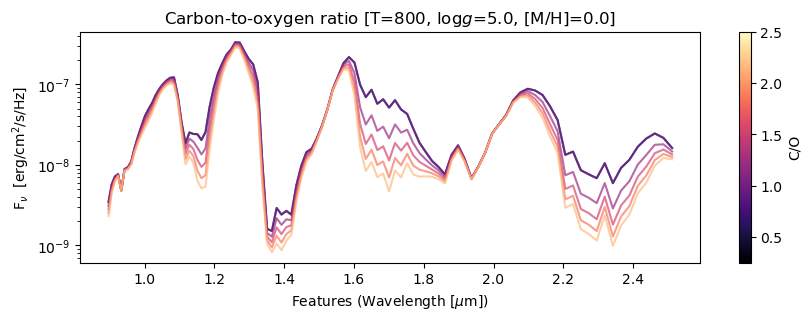

In [10]:
# Define the filter bounds
filter_bounds = {'gravity': (5.,5), 
                 'c_o_ratio' : (0.25,2.5),
                 'metallicity' : (0.0,0.0),
                 'temperature': (800, 800)}

# Call the function to filter the dataset
plot_filtered_dataframe(train_BD[train_BD['is_augmented'].isin(
                                    ['no'])], 
                                       filter_bounds,
                                       'c_o_ratio',                                     
                        title_label = '[T='+str(filter_bounds['temperature'][0])+
                                    ', log$g$='+str(filter_bounds['gravity'][0])+
                                    ', [M/H]='+str(filter_bounds['metallicity'][0])+
                        ']',
                             wl_synthetic = wl_synthetic.wl,
                            __reference_data__ = __reference_data_path__)

### 1.4.4 Metallicity

Plot the brown dwarf datasets for [M/H]= -1.0 - 2.0 while other paremeters are constnat ($T_{eff}$=800, log$g$=5.0, C/O=1.0)

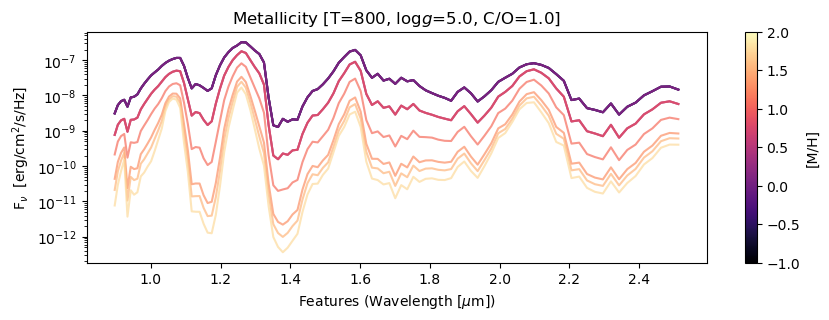

In [11]:
# Define the filter bounds
filter_bounds = {'gravity': (5.,5), 
                 'c_o_ratio' : (1.,1.),
                 'metallicity' : (-1,2),
                 'temperature': (800, 800)}

# Call the function to filter the dataset
plot_filtered_dataframe(train_BD[train_BD['is_augmented'].isin(
                                    ['no'])], 
                                       filter_bounds,
                                       'metallicity',                                     
                        title_label = '[T='+str(filter_bounds['temperature'][0])+
                                    ', log$g$='+str(filter_bounds['gravity'][0])+
                                    ', C/O='+str(filter_bounds['c_o_ratio'][0])+
                        ']',
                             wl_synthetic = wl_synthetic.wl,
                            __reference_data__ = __reference_data_path__)

---